In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from math import prod
import os

In [2]:
# The data is stored in a 5XX.csv for the serial tests, and 6XX.csv for the parallel tests
# The data files are in the `/data` folder

# Check if the data is loaded
# If not, load it
if 'all_data' in locals():
    print("Data already loaded")
else:
    # A structure for storing the data
    all_data = {}

    for i in range(500, 600):
        if os.path.isfile("../data/access-patterns/" + str(i) + ".csv"):
            all_data[i] = pd.read_csv("../data/access-patterns/" + str(i) + ".csv")
            print("Loaded data for test " + str(i))

Loaded data for test 511
Loaded data for test 520


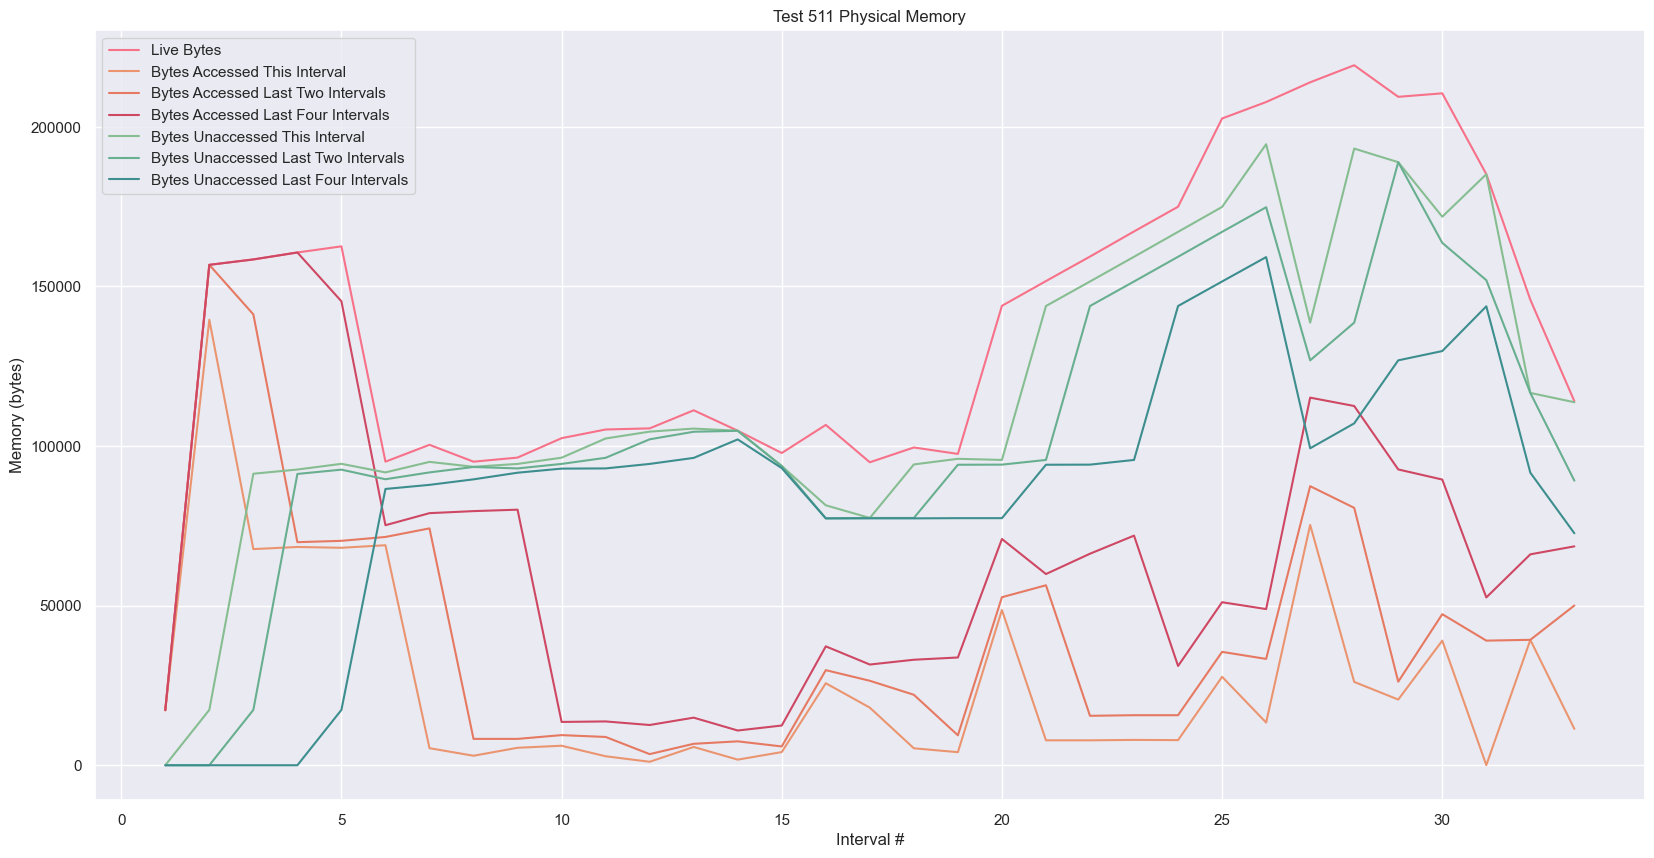

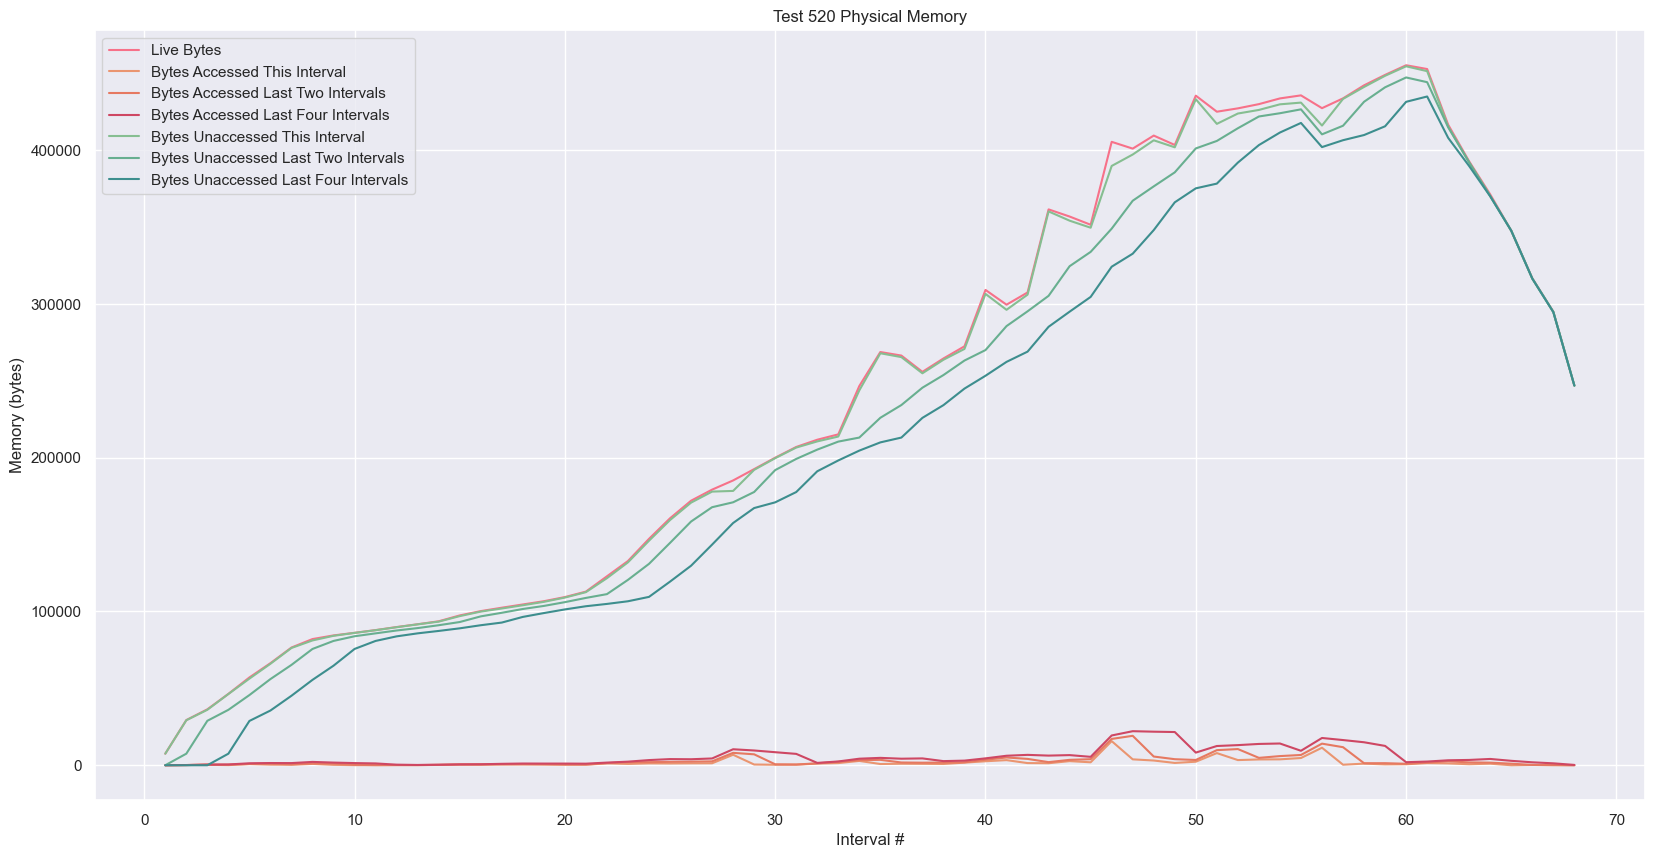

In [3]:
# Graph the following columns as lines for each test:
# Total Memory Allocated
# Total Memory Freed
# Memory Allocated Since Last Interval
# Memory Freed Since Last Interval
# Objects Live This Interval Physical Size
# Objects Live >=2 Intervals Physical Size
# Objects Live >=4 Intervals Physical Size
# Objects Live >=8 Intervals Physical Size
# Objects Live >=10 Intervals Physical Size
# Objects Live >=16 Intervals Physical Size
# Objects Live >=24 Intervals Physical Size
# Objects Live >=32 Intervals Physical Size
# Objects Live This Interval Virtual Size
# Objects Live >=2 Intervals Virtual Size
# Objects Live >=4 Intervals Virtual Size
# Objects Live >=8 Intervals Virtual Size
# Objects Live >=10 Intervals Virtual Size
# Objects Live >=16 Intervals Virtual Size
# Objects Live >=24 Intervals Virtual Size
# Objects Live >=32 Intervals Virtual Size


# Get the tests from the data
tests = list(all_data.keys())

# Iterate over the tests and graph the results
for test_number in tests:
    # Get the data for the test
    test_data = all_data[test_number]
    
    # Graph the data
    # x-axis is the "Interval #" column
    plt.figure(figsize=(20, 10))
    
    # Graph with SNS
    sns.set_theme()
    # Set the colors
    # sns.set_palette("husl")
    colors = sns.color_palette("husl", 8)
    sns.lineplot(data=test_data, x="Interval #", y="Live Bytes", label="Live Bytes", color=colors[0])
    
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Allocated", label="Total Memory Allocated")
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Freed", label="Total Memory Freed")
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Allocated Since Last Interval", label="New Memory Allocated")
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Freed Since Last Interval", label="Memory Freed")    
    colors = sns.color_palette("flare", 8)
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed This Interval", color=colors[0], label="Bytes Accessed This Interval")
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed Last Two Intervals", color=colors[1], label="Bytes Accessed Last Two Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed Last Three Intervals", color=colors[2], label="Bytes Accessed Last Three Intervals")
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed Last Four Intervals", color=colors[3], label="Bytes Accessed Last Four Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed Last Five Intervals", color=colors[4], label="Bytes Accessed Last Five Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Accessed Last Six Intervals", color=colors[5], label="Bytes Accessed Last Six Intervals")
    
    colors = sns.color_palette("crest", 8)
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed This Interval", color=colors[0], label="Bytes Unaccessed This Interval")
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed Last Two Intervals", color=colors[1], label="Bytes Unaccessed Last Two Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed Last Three Intervals", color=colors[2], label="Bytes Unaccessed Last Three Intervals")
    sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed Last Four Intervals", color=colors[3], label="Bytes Unaccessed Last Four Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed Last Five Intervals", color=colors[4], label="Bytes Unaccessed Last Five Intervals")
    # sns.lineplot(data=test_data, x="Interval #", y="Bytes Unaccessed Last Six Intervals", color=colors[5], label="Bytes Unaccessed Last Six Intervals")
    
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Allocated Since Last Interval", label="Memory Allocated Since Last Interval")
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Freed Since Last Interval", label="Memory Freed Since Last Interval")
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live This Interval Physical Size", label="Objects Live This Interval Physical Size", color=colors[0])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=2 Intervals Physical Size", label="Objects Live >=2 Intervals Physical Size", color=colors[1])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=4 Intervals Physical Size", label="Objects Live >=4 Intervals Physical Size", color=colors[2])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=8 Intervals Physical Size", label="Objects Live >=8 Intervals Physical Size", color=colors[3])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=10 Intervals Physical Size", label="Objects Live >=10 Intervals Physical Size", color=colors[4])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=16 Intervals Physical Size", label="Objects Live >=16 Intervals Physical Size", color=colors[5])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=24 Intervals Physical Size", label="Objects Live >=24 Intervals Physical Size", color=colors[6])
    # sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=32 Intervals Physical Size", label="Objects Live >=32 Intervals Physical Size", color=colors[7])
    
    plt.title("Test " + str(test_number) + " Physical Memory")
    
    plt.xlabel("Interval #")
    plt.ylabel("Memory (bytes)")
    
    plt.legend()
    plt.show()

In [ ]:
# Print the average percentage of unaccessed memory across all intervals for each test
for test_number in tests:
    test_data = all_data[test_number]
    total_bytes = test_data["Bytes Accessed This Interval"] + test_data["Bytes Unaccessed This Interval"]
    unaccessed_bytes = test_data["Bytes Unaccessed This Interval"]
    unaccessed_percentage = unaccessed_bytes.sum() / total_bytes.sum()
    print("Test " + str(test_number) + " unaccessed percentage: " + str(unaccessed_percentage))